Project Overview

The goal of this project was to study and understand the delivery process across different stages of the company’s supply chain — from manufacturing to warehousing, logistics, and retail.
To identify where delays happen, what causes them, and how costs vary, so the business can improve delivery speed, reduce costs, and plan better.

In [ ]:
import pandas as pd
df= pd.read_csv("Supply_chain_data.csv")
print(df.head(10).to_string())

  Transaction ID          Stage       Entity                   Timestamp   RFID ID  GPS Latitude  GPS Longitude  Temperature   Humidity  Route ID      Speed Delivery Status        Risk Factor  Delay Time        Cost    Disruption Type
0          TXN_1      Warehouse    Carrier B  2024-04-07 11:52:52.342727  RFID_100     35.925665     -78.691472    25.271635  60.039711   Route_1  45.427197      In Transit            Traffic    1.862374  374.120566            Weather
1          TXN_2       Retailer  Warehouse C  2024-11-29 11:52:52.342727  RFID_101     37.709505     -78.765106    30.850663  76.380263   Route_2  52.609209      In Transit  Equipment Failure    8.965081  359.277352        Traffic Jam
2          TXN_3  Manufacturing   Supplier A  2024-03-08 11:52:52.342727  RFID_102     39.364729     -75.468727     6.271055  73.211265   Route_3  86.909265      In Transit            Weather   39.899799   93.089389  Equipment Failure
3          TXN_4      Warehouse   Supplier A  2024-04-17 11:

In [3]:
print(df.shape)

(1000, 16)


In [4]:
print(df.columns.tolist())

['Transaction ID', 'Stage', 'Entity', 'Timestamp', 'RFID ID', 'GPS Latitude', 'GPS Longitude', 'Temperature', 'Humidity', 'Route ID', 'Speed', 'Delivery Status', 'Risk Factor', 'Delay Time', 'Cost', 'Disruption Type']


**Data Cleaning**

In [5]:
print(df.isnull().sum())       # Missing values per column
print(df.isnull().sum().sum()) # Total missing values

Transaction ID     0
Stage              0
Entity             0
Timestamp          0
RFID ID            0
GPS Latitude       0
GPS Longitude      0
Temperature        0
Humidity           0
Route ID           0
Speed              0
Delivery Status    0
Risk Factor        0
Delay Time         0
Cost               0
Disruption Type    0
dtype: int64
0


In [6]:
print(df.dtypes)

Transaction ID      object
Stage               object
Entity              object
Timestamp           object
RFID ID             object
GPS Latitude       float64
GPS Longitude      float64
Temperature        float64
Humidity           float64
Route ID            object
Speed              float64
Delivery Status     object
Risk Factor         object
Delay Time         float64
Cost               float64
Disruption Type     object
dtype: object


In [7]:
# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Double-check numeric columns (sometimes numbers are read as text)
num_cols = ["GPS Latitude", "GPS Longitude", "Temperature", "Humidity", "Speed", "Delay Time", "Cost"]
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")


print(df.dtypes)

Transaction ID             object
Stage                      object
Entity                     object
Timestamp          datetime64[ns]
RFID ID                    object
GPS Latitude              float64
GPS Longitude             float64
Temperature               float64
Humidity                  float64
Route ID                   object
Speed                     float64
Delivery Status            object
Risk Factor                object
Delay Time                float64
Cost                      float64
Disruption Type            object
dtype: object


In [8]:
# Check if any Timestamp values failed to convert (became NaT)
print("\nMissing (NaT) timestamps:", df["Timestamp"].isna().sum())

# Just to be sure, let's see the date range 
print("\nDate range:")
print("From:", df["Timestamp"].min())
print("To:  ", df["Timestamp"].max())


Missing (NaT) timestamps: 0

Date range:
From: 2024-02-05 11:52:52.342727
To:   2025-02-04 11:52:52.346721


In [9]:
# Check missing values again
print("Missing values per column:\n")
print(df.isna().sum())

# Check for duplicate Transaction IDs
dup_txn = df.duplicated(subset=["Transaction ID"]).sum()
print(f"\nDuplicate Transaction IDs: {dup_txn}")

# Check for fully duplicate rows
dup_rows = df.duplicated().sum()
print(f"Fully duplicate rows: {dup_rows}")


Missing values per column:

Transaction ID     0
Stage              0
Entity             0
Timestamp          0
RFID ID            0
GPS Latitude       0
GPS Longitude      0
Temperature        0
Humidity           0
Route ID           0
Speed              0
Delivery Status    0
Risk Factor        0
Delay Time         0
Cost               0
Disruption Type    0
dtype: int64

Duplicate Transaction IDs: 0
Fully duplicate rows: 0


In [ ]:
print(df.describe())

                           Timestamp  GPS Latitude  GPS Longitude  \
count                           1000   1000.000000    1000.000000   
mean   2024-08-01 11:08:13.945202432     37.535087     -77.487971   
min       2024-02-05 11:52:52.342727     35.016091     -79.999942   
25%    2024-04-28 11:52:52.345722880     36.205371     -78.693245   
50%    2024-07-30 11:52:52.345722880     37.593670     -77.496930   
75%    2024-10-29 23:52:52.346721024     38.802325     -76.204482   
max       2025-02-04 11:52:52.346721     39.997069     -75.010896   
std                              NaN      1.460949       1.453371   

       Temperature     Humidity        Speed   Delay Time         Cost  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     17.066877    54.587373    54.861804    23.153790   268.923511  
min      -4.970597    20.002150    10.556544     0.011568    50.109320  
25%       5.885535    37.148180    32.444200    11.327486   162.222670  
50%      16.7

In [11]:
df.columns = df.columns.str.strip()                # remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')      # replace spaces with underscores
print(df.columns)

Index(['Transaction_ID', 'Stage', 'Entity', 'Timestamp', 'RFID_ID',
       'GPS_Latitude', 'GPS_Longitude', 'Temperature', 'Humidity', 'Route_ID',
       'Speed', 'Delivery_Status', 'Risk_Factor', 'Delay_Time', 'Cost',
       'Disruption_Type'],
      dtype='object')


In [12]:
# Check unique value counts for each column
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Transaction_ID: 1000 unique values
Stage: 4 unique values
Entity: 4 unique values
Timestamp: 748 unique values
RFID_ID: 1000 unique values
GPS_Latitude: 1000 unique values
GPS_Longitude: 1000 unique values
Temperature: 1000 unique values
Humidity: 1000 unique values
Route_ID: 1000 unique values
Speed: 1000 unique values
Delivery_Status: 2 unique values
Risk_Factor: 4 unique values
Delay_Time: 1000 unique values
Cost: 1000 unique values
Disruption_Type: 4 unique values


In [13]:
# Reset the index
# Sometimes, after removing or reshuffling data, the row numbers (index) get messy. This makes sure everything is neat.
df.reset_index(drop=True, inplace=True)
print(df)

    Transaction_ID          Stage       Entity                  Timestamp  \
0            TXN_1      Warehouse    Carrier B 2024-04-07 11:52:52.342727   
1            TXN_2       Retailer  Warehouse C 2024-11-29 11:52:52.342727   
2            TXN_3  Manufacturing   Supplier A 2024-03-08 11:52:52.342727   
3            TXN_4      Warehouse   Supplier A 2024-04-17 11:52:52.342727   
4            TXN_5      Warehouse   Supplier A 2024-03-17 11:52:52.342727   
..             ...            ...          ...                        ...   
995        TXN_996  Manufacturing   Supplier A 2025-01-08 11:52:52.346721   
996        TXN_997  Manufacturing    Carrier B 2024-06-02 11:52:52.346721   
997        TXN_998       Retailer   Supplier A 2024-07-02 11:52:52.346721   
998        TXN_999       Retailer  Warehouse C 2024-06-09 11:52:52.346721   
999       TXN_1000      Warehouse   Supplier A 2024-11-20 11:52:52.346721   

       RFID_ID  GPS_Latitude  GPS_Longitude  Temperature   Humidity  \
0   

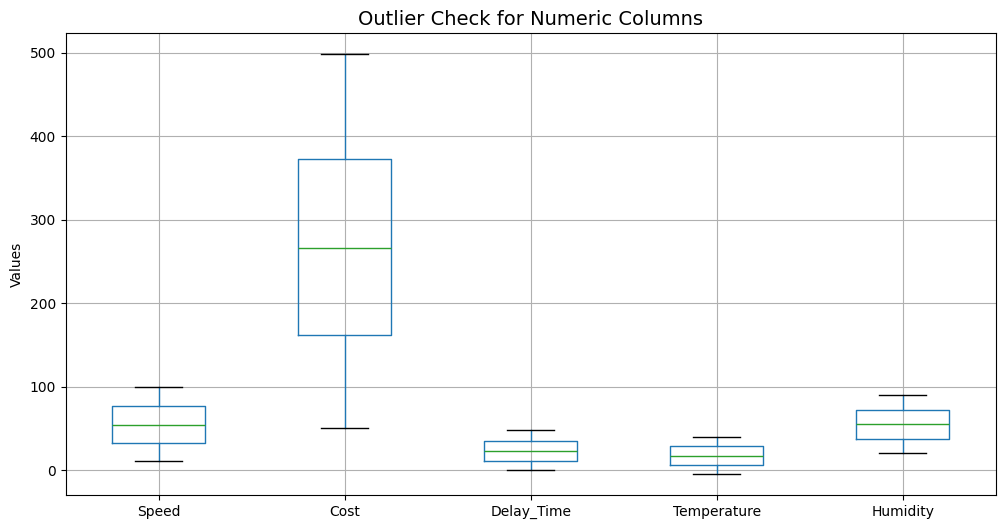

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["Speed", "Cost", "Delay_Time", "Temperature", "Humidity"]

# Boxplots help us see extreme values visually
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Outlier Check for Numeric Columns", fontsize=14)
plt.ylabel("Values")
plt.show()

In [15]:
# Handle outliers 
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap values instead of removing
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)

# Apply to key numeric columns
for col in ["Speed", "Cost", "Delay_Time", "Temperature", "Humidity"]:
    cap_outliers(df, col)

In [16]:
# Check correlation between all numeric columns
correlation = df.corr(numeric_only=True)

# Print the correlation table
print("Correlation Table:")
print(correlation)

Correlation Table:
               GPS_Latitude  GPS_Longitude  Temperature  Humidity     Speed  \
GPS_Latitude       1.000000       0.027262    -0.005791  0.032911  0.029994   
GPS_Longitude      0.027262       1.000000    -0.013560 -0.008858 -0.020353   
Temperature       -0.005791      -0.013560     1.000000 -0.044812  0.039959   
Humidity           0.032911      -0.008858    -0.044812  1.000000 -0.055864   
Speed              0.029994      -0.020353     0.039959 -0.055864  1.000000   
Delay_Time         0.049960      -0.046775    -0.022849 -0.008889  0.012288   
Cost               0.003279      -0.005227     0.025397  0.028328 -0.031942   

               Delay_Time      Cost  
GPS_Latitude     0.049960  0.003279  
GPS_Longitude   -0.046775 -0.005227  
Temperature     -0.022849  0.025397  
Humidity        -0.008889  0.028328  
Speed            0.012288 -0.031942  
Delay_Time       1.000000 -0.049307  
Cost            -0.049307  1.000000  


**Exploratory Data Analysis (EDA)**

1. The average delivery delay time by stage (Warehouse, Retailer, Manufacturing, Logistics)?

In [17]:
# Average Delivery Delay Time by Stage
avg_delay_stage = df.groupby('Stage')['Delay_Time'].mean().reset_index()

# Show result as table
print(avg_delay_stage)

           Stage  Delay_Time
0      Logistics   22.329121
1  Manufacturing   23.282173
2       Retailer   23.585133
3      Warehouse   23.307991


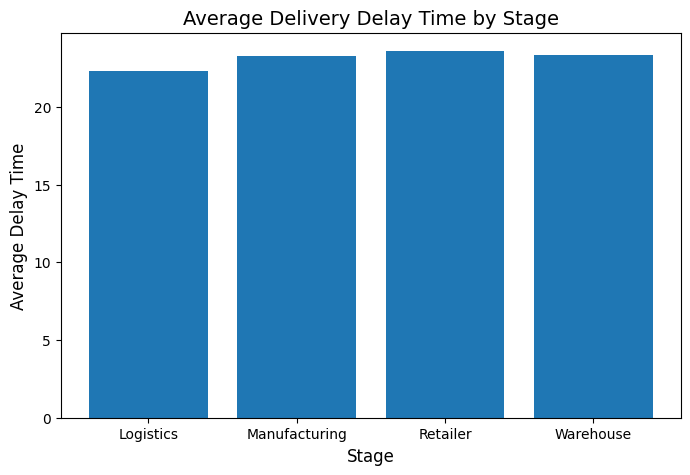

In [18]:
import matplotlib.pyplot as plt

# Bar chart for average delay by stage
plt.figure(figsize=(8,5))
plt.bar(avg_delay_stage['Stage'], avg_delay_stage['Delay_Time'])

plt.title('Average Delivery Delay Time by Stage', fontsize=14)
plt.xlabel('Stage', fontsize=12)
plt.ylabel('Average Delay Time', fontsize=12)
plt.show()

Deliveries take the longest time at the Retailer stage, while the Logistics stage has the shortest delay.

2. Which problem causes the delivery to be the slowest?

In [19]:
# Find which problem makes deliveries slowest
slow_problem = df.groupby('Disruption_Type')['Delay_Time'].mean().reset_index()
slow_problem = slow_problem.sort_values(by='Delay_Time', ascending=False)
print(slow_problem)

     Disruption_Type  Delay_Time
3            Weather   23.704812
1             Strike   23.190144
0  Equipment Failure   23.058293
2        Traffic Jam   22.653255


Deliveries are slowest when there is bad weather, and fastest when there is a traffic jam.

3. Which partners spend the most and least on deliveries?

In [20]:
# Find average cost for each company or partner
avg_cost_entity = df.groupby('Entity')['Cost'].mean().reset_index()

# Sort from highest to lowest
avg_cost_entity = avg_cost_entity.sort_values(by='Cost', ascending=False)

print(avg_cost_entity)

        Entity        Cost
1   Retailer D  274.068697
0    Carrier B  272.125152
3  Warehouse C  268.359069
2   Supplier A  262.251320


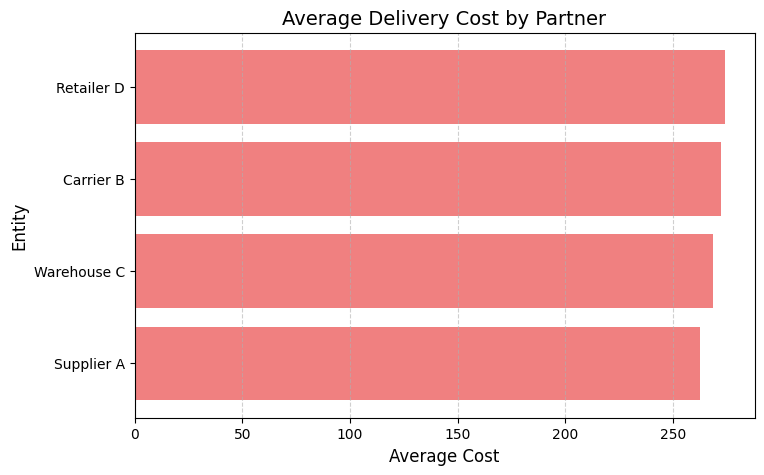

In [21]:
# Horizontal Bar Chart for average cost by entity
plt.figure(figsize=(8,5))
plt.barh(avg_cost_entity['Entity'], avg_cost_entity['Cost'], color='lightcoral')

plt.title('Average Delivery Cost by Partner', fontsize=14)
plt.xlabel('Average Cost', fontsize=12)
plt.ylabel('Entity', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Highest cost shows at the top
plt.show()

Retailer D spends the most money, while Supplier A spends the least on deliveries.

4. Is there any link between delivery speed and delay time?

Do slower deliveries take more time to arrive?

In [22]:
# Check if speed and delay have a connection
correlation = df['Speed'].corr(df['Delay_Time'])
print("Relation between Speed and Delay Time:", correlation)

Relation between Speed and Delay Time: 0.012288223137480861


The number is very close to zero, which means speed and delay don’t really affect each other — fast speed doesn’t always mean faster delivery.

Instead of just focusing on speed, the company should look at other reasons for delay — like weather, planning, or equipment problems — to make deliveries more reliable.


5. What is the average weather condition (temperature and humidity) during deliveries?

what kind of weather usually happens when deliveries take place?

In [23]:
# Find average temperature and humidity
avg_weather = df[['Temperature', 'Humidity']].mean()

print(avg_weather)

Temperature    17.066877
Humidity       54.587373
dtype: float64


Most deliveries happen when the weather is cool (around 17°C) and a bit humid (about 55%).

Since humidity is moderate, the company should use weather-friendly packaging and plan routes carefully during hotter or wetter days to keep goods safe and on time.

Risk & Performance Analysis

6. Which problem (Traffic, Weather, Equipment Failure, Human Error) happens most often during deliveries?

In [24]:
# Count how many times each problem happens
risk_count = df['Disruption_Type'].value_counts().reset_index()

# Rename columns for clarity
risk_count.columns = ['Problem', 'Count']

print(risk_count)

             Problem  Count
0             Strike    267
1            Weather    248
2        Traffic Jam    247
3  Equipment Failure    238


The most common problem is Strike, while Equipment Failure happens the least.

The company should build backup plans for strike days — like using alternate suppliers or delivery partners — so work doesn’t stop completely during strikes.

7. What is the average money spent for each delivery status (like Delivered, In Transit, Delayed, etc.)?

In [25]:
# Find average cost for each delivery status
avg_cost_status = df.groupby('Delivery_Status')['Cost'].mean().reset_index()

print(avg_cost_status)

  Delivery_Status        Cost
0       Delivered  267.287314
1      In Transit  270.681914


Deliveries that are still on the way (In Transit) cost a bit more than those already Delivered.

Try to speed up deliveries so fewer are left “In Transit.”
This can save money and make customers happier too.

8. Which routes take the longest time for delivery?

(This shows which paths or locations are slowest.)

In [26]:
# Find average delay time for each route
route_delay = df.groupby('Route_ID')['Delay_Time'].mean().reset_index()

# Sort to find routes with biggest delays
route_delay = route_delay.sort_values(by='Delay_Time', ascending=False)

print(route_delay.head())

      Route_ID  Delay_Time
397  Route_456   47.947426
555  Route_599   47.876301
670  Route_701   47.840797
460  Route_512   47.783213
897  Route_906   47.620425


Deliveries take the longest time on Route_456, and other routes like 599 and 701 are also quite slow.

Check these slow routes for traffic, road issues, or planning problems.
If possible, choose shorter paths or adjust delivery times to avoid busy hours.

9. Which work stage (like Warehouse, Retailer, Manufacturing, or Logistics) has the most packages that are still "In Transit"?

In [27]:
# Count how many deliveries are 'In Transit' in each stage
in_transit_stage = df[df['Delivery_Status'] == 'In Transit']['Stage'].value_counts().reset_index()

# Rename columns for clarity
in_transit_stage.columns = ['Stage', 'In_Transit_Count']

print(in_transit_stage)

           Stage  In_Transit_Count
0       Retailer               133
1  Manufacturing               131
2      Logistics               117
3      Warehouse               101


The Retailer stage has the most packages still on the way, while the Warehouse has the least.

The company should speed up deliveries at the Retailer stage by improving coordination and tracking shipments better.
Faster communication can help reduce waiting time and get products to customers quicker.

Time-Based Analysis

10. How do delivery delays change month by month?

(Do some months have more delay than others?)

In [28]:
# Change date into month number
df['Month'] = pd.to_datetime(df['Timestamp']).dt.month

# Find average delay for each month
monthly_delay = df.groupby('Month')['Delay_Time'].mean().reset_index()

print(monthly_delay)

    Month  Delay_Time
0       1   24.233525
1       2   22.962488
2       3   22.974734
3       4   24.016956
4       5   21.404110
5       6   23.250491
6       7   23.655280
7       8   25.959934
8       9   22.372919
9      10   23.888601
10     11   24.054646
11     12   19.438618


Deliveries were slowest in August, while December had the quickest deliveries.

Since August has the most delays, check if it’s due to weather or staff holidays.
The company can add extra workers or plan deliveries earlier in that month.

11. Which month had the most delivery problems (like Weather, Traffic, or Equipment issues)?

In [29]:
# Count how many problems happened in each month
month_disruptions = df.groupby('Month')['Disruption_Type'].count().reset_index()

# Rename columns
month_disruptions.columns = ['Month', 'Disruption_Count']

print(month_disruptions.sort_values(by='Disruption_Count', ascending=False))


    Month  Disruption_Count
3       4                99
8       9                95
4       5                91
0       1                90
9      10                86
2       3                86
6       7                85
10     11                79
1       2                78
11     12                76
5       6                71
7       8                64


The highest number of delivery problems happened in April, while August had the fewest.

Since April faces the most issues, check what causes them — maybe weather, strikes, or traffic.
The company can plan extra support or backup routes during that month.

12. Do changes in weather (temperature or humidity) affect how late deliveries are?

when it’s hotter or more humid, do deliveries get slower?

In [30]:
# Check if temperature and humidity affect delay time
weather_relation = df[['Temperature', 'Humidity', 'Delay_Time']].corr()

print(weather_relation)

             Temperature  Humidity  Delay_Time
Temperature     1.000000 -0.044812   -0.022849
Humidity       -0.044812  1.000000   -0.008889
Delay_Time     -0.022849 -0.008889    1.000000


In [31]:
df.columns

Index(['Transaction_ID', 'Stage', 'Entity', 'Timestamp', 'RFID_ID',
       'GPS_Latitude', 'GPS_Longitude', 'Temperature', 'Humidity', 'Route_ID',
       'Speed', 'Delivery_Status', 'Risk_Factor', 'Delay_Time', 'Cost',
       'Disruption_Type', 'Month'],
      dtype='object')

In [32]:
df.shape

(1000, 17)

The numbers are very close to zero, which means weather doesn’t really change delivery times — hot or humid days don’t make much difference.

Since weather doesn’t affect delays much, the company should focus on other causes like strikes, traffic, or planning, to make deliveries even smoothe

Supplier A spends the least money, and Retailer D spends the most on deliveries.

Supplier A can keep its cost strategy as an example for others.
Retailer D should review its spending, maybe by finding cheaper delivery options or combining shipments to save money.

**Summary**

The project focused on understanding how the delivery process works from manufacturing to retail. The main goal was to find where delays happen, why they occur, and how much each stage and partner spends during the process.

The analysis showed that the Retailer stage had the longest delivery delays, while the Logistics stage was the fastest. This means most delays happened near the end of the supply chain, where products reach stores or customers.

The main reasons for delays were bad weather, strikes, and traffic jams. These issues slowed down deliveries and increased waiting time for products to reach their final stage.

When checking delivery costs, Retailer D spent the most money, while Supplier A spent the least. Deliveries that were still “In Transit” were slightly more expensive than completed ones, showing a need to improve route planning and timing.

Some routes, such as Route_456 and Route_599, took much longer for delivery. This suggests those routes may face transport or distance challenges and need better scheduling or alternate paths.

Across the months, August showed the highest delays, and December had the fastest deliveries. This shows seasonal patterns where certain months need extra attention for weather or workload reasons.

The weather data showed deliveries usually happened in mild conditions around 17°C and 55% humidity, and there was no strong link between weather changes and delivery time. So, other factors like management and planning matter more.

Overall, the supply chain runs smoothly, but there are a few slow and costly points that can be improved. By managing retailer delays, problem routes, and unplanned strikes or weather issues, the company can make deliveries faster, cheaper, and more reliable.